In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import os
os.chdir("/Users/zyxu/Documents/R/23spring")

from tools.pre_visz import pre_visz

In [6]:
study_decompositions, study_decompositions_traditional, sim_study_groundTruth = pre_visz(
        matrix_data_path = "./dataset/sim_matrix_data.csv", 
        study_names_path = "./dataset/sim_study_name.csv",
        study_ground_truth_path  ="./dataset/sim_study_groundTruth.json",
        optimized_V_path = "./output/sim/best_V.pt")
unique_studies = study_decompositions.keys()

(100, 200)
(150, 200)
(200, 200)
(250, 200)
(300, 200)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample study

def plot_study_U(study):
    U_study = study_decompositions[study][0]
    U_study_traditional = study_decompositions_traditional[study][0]
    # U_difference = U_study - U_study_traditional
    U_groundTruth = np.array(sim_study_groundTruth[study])

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Heatmap of U from study_decompositions
    sns.heatmap(U_study, ax=axes[0], cmap='coolwarm', cbar=False)
    axes[0].set_title('U from study_decompositions')

    # Heatmap of U from study_decompositions_traditional
    sns.heatmap(U_study_traditional, ax=axes[1], cmap='coolwarm', cbar=False)
    axes[1].set_title('U from study_decompositions_traditional')

    # Ground truth U
    sns.heatmap(U_groundTruth, ax=axes[2], cmap='coolwarm')
    axes[2].set_title('Ground truth U matrices')

    # Heatmap of the difference
    # sns.heatmap(U_difference, ax=axes[2], cmap='coolwarm')
    # axes[2].set_title('Difference between U matrices')



    plt.tight_layout(pad=1.0)
    plt.show()

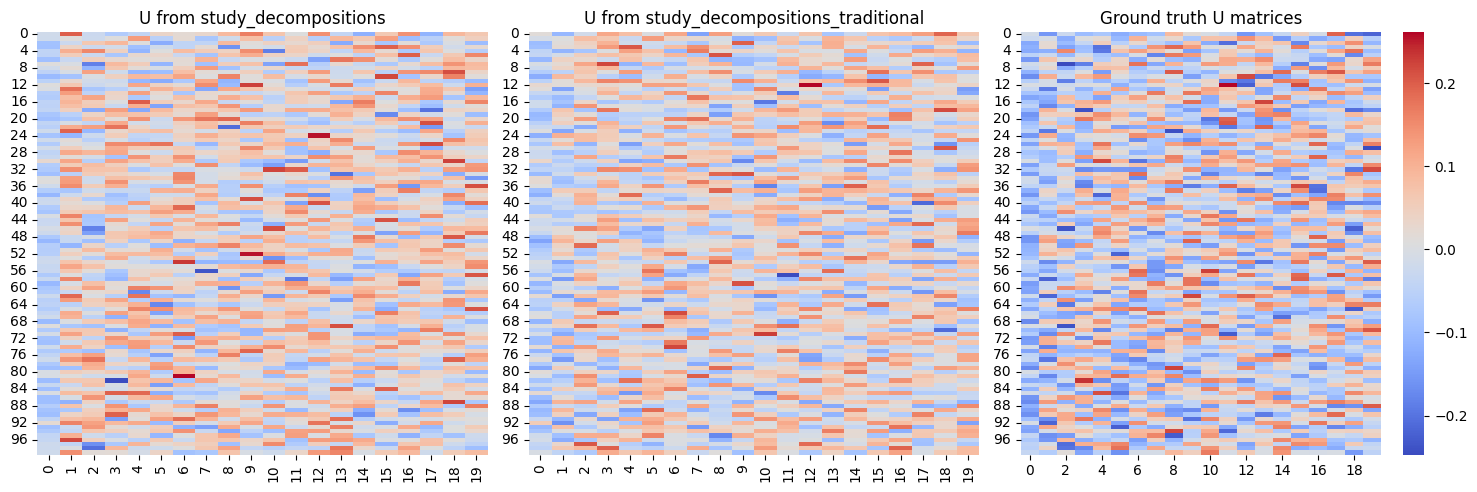

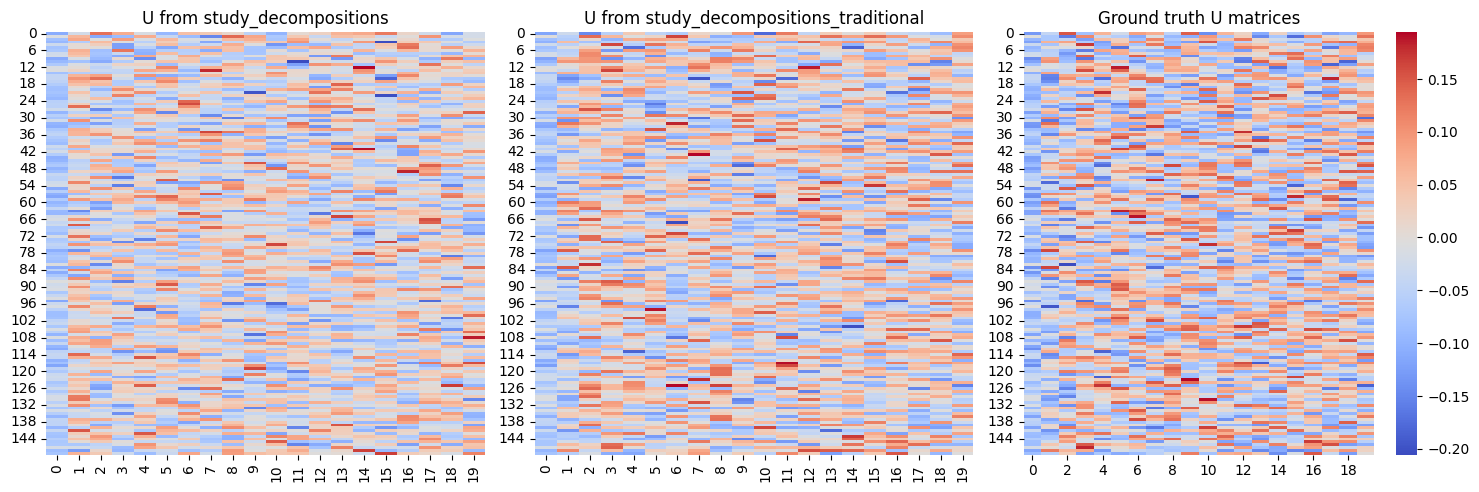

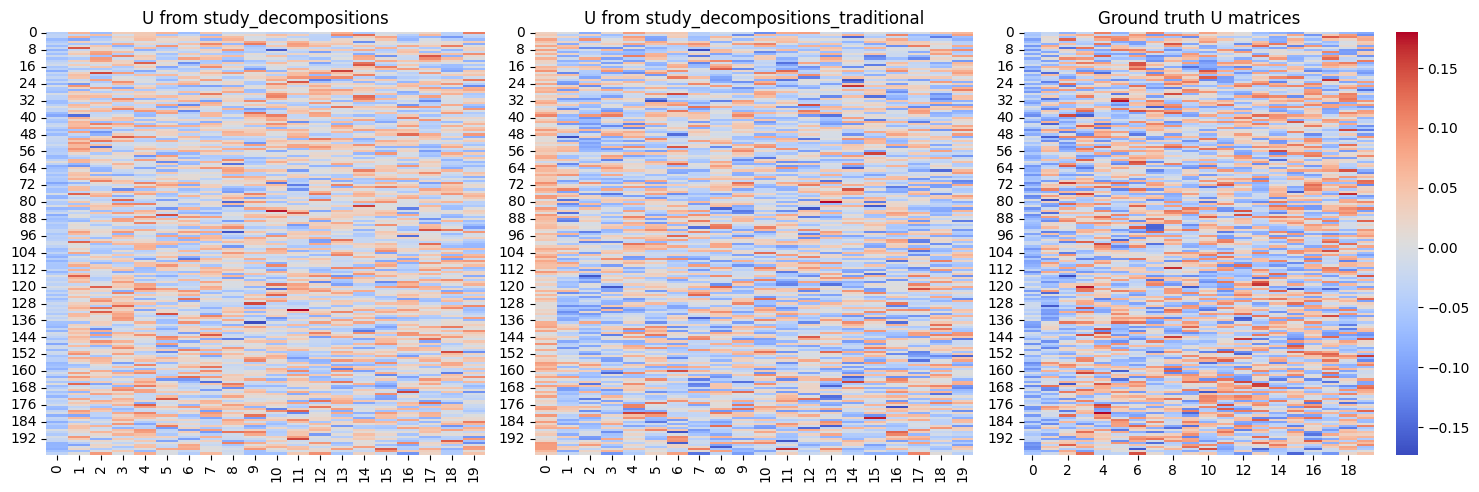

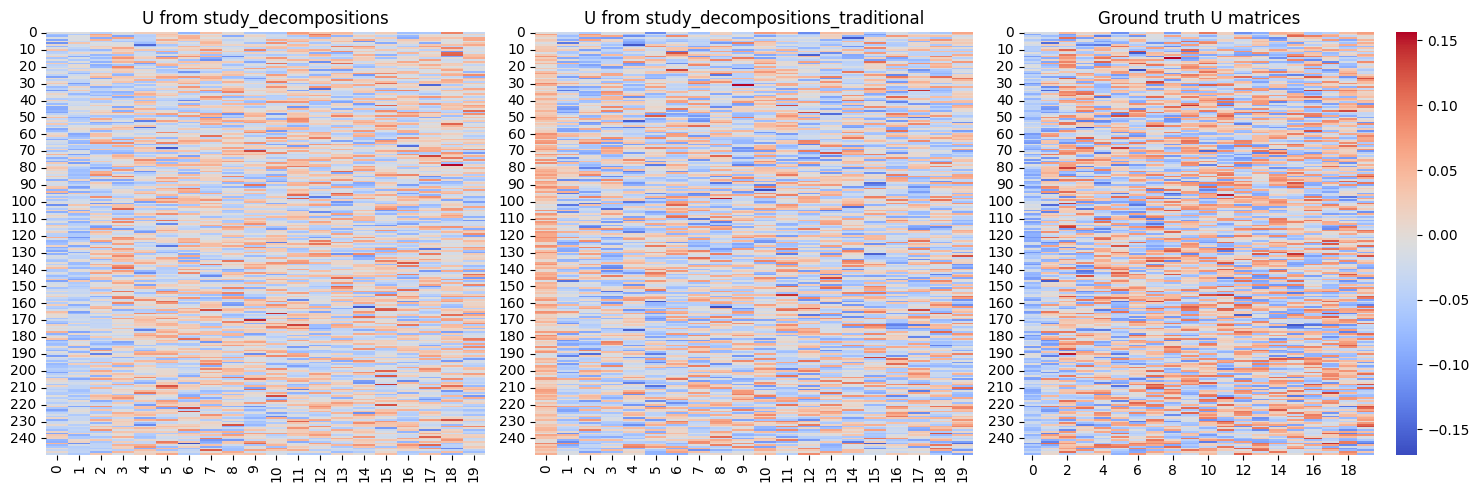

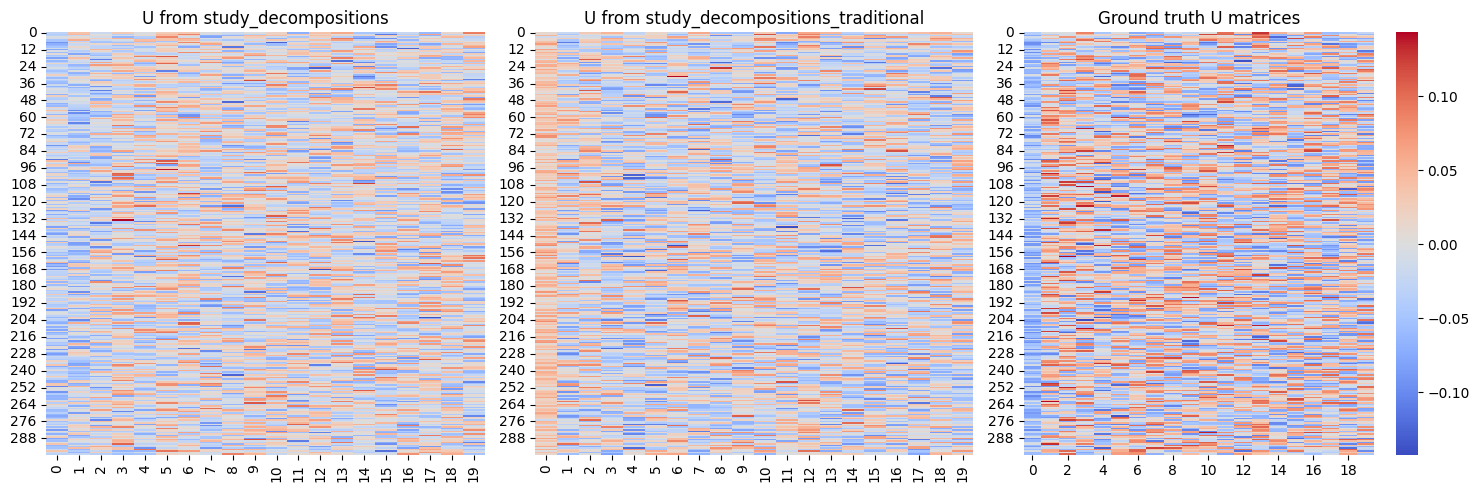

In [8]:
for study in unique_studies:
    plot_study_U(study)

In [9]:
from collections import defaultdict 

def com_loss(study):
    U_study = study_decompositions[study][0]
    U_study_traditional = study_decompositions_traditional[study][0]
    # U_difference = U_study - U_study_traditional
    U_groundTruth = np.array(sim_study_groundTruth[study])
    # Compute difference matrices
    diff_U_study = U_study - U_groundTruth
    diff_U_study_traditional = U_study_traditional - U_groundTruth

    # Compute Frobenius norms
    norm_U_study = np.linalg.norm(diff_U_study, 'fro')
    norm_U_study_traditional = np.linalg.norm(diff_U_study_traditional, 'fro')

    print(f"Frobenius norm of the difference between U_study and U_groundTruth: {norm_U_study}")
    print(f"Frobenius norm of the difference between U_study_traditional and U_groundTruth: {norm_U_study_traditional}")

    return norm_U_study, norm_U_study_traditional
loss = defaultdict(list)

for study in unique_studies:
    loss["study"].append(study)
    norm_U_study, norm_U_study_traditional = com_loss(study)
    loss["ours"].append(norm_U_study)
    loss["SVD"].append(norm_U_study_traditional)

Frobenius norm of the difference between U_study and U_groundTruth: 6.107140004746624
Frobenius norm of the difference between U_study_traditional and U_groundTruth: 6.15845660148414
Frobenius norm of the difference between U_study and U_groundTruth: 6.117442162775749
Frobenius norm of the difference between U_study_traditional and U_groundTruth: 5.3116622975681915
Frobenius norm of the difference between U_study and U_groundTruth: 6.156957041130018
Frobenius norm of the difference between U_study_traditional and U_groundTruth: 6.675255145541034
Frobenius norm of the difference between U_study and U_groundTruth: 6.600473008350384
Frobenius norm of the difference between U_study_traditional and U_groundTruth: 5.728456195809513
Frobenius norm of the difference between U_study and U_groundTruth: 6.265715824012336
Frobenius norm of the difference between U_study_traditional and U_groundTruth: 5.980590140144534


In [10]:
import pandas as pd
pd.DataFrame(loss)

,study,ours,SVD
0,A,6.107140,6.158457
1,B,6.117442,5.311662
2,C,6.156957,6.675255
3,D,6.600473,5.728456
4,E,6.265716,5.980590
